In [52]:
#Simple Linear Regression using headbrain.csv

In [53]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)


#read data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [54]:
#collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [55]:
#mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
m = len(X)

In [56]:
#calculating b1 and b0

num = 0
den = 0

X_new = X-mean_x
Y_new = Y-mean_y

num = np.dot(X_new.T, Y_new)
den = np.dot(X_new, X_new.T)

b1 = num/den
b0 = mean_y - b1*mean_x

print(b1, b0)

(0.26342933948939934, 325.57342104944257)


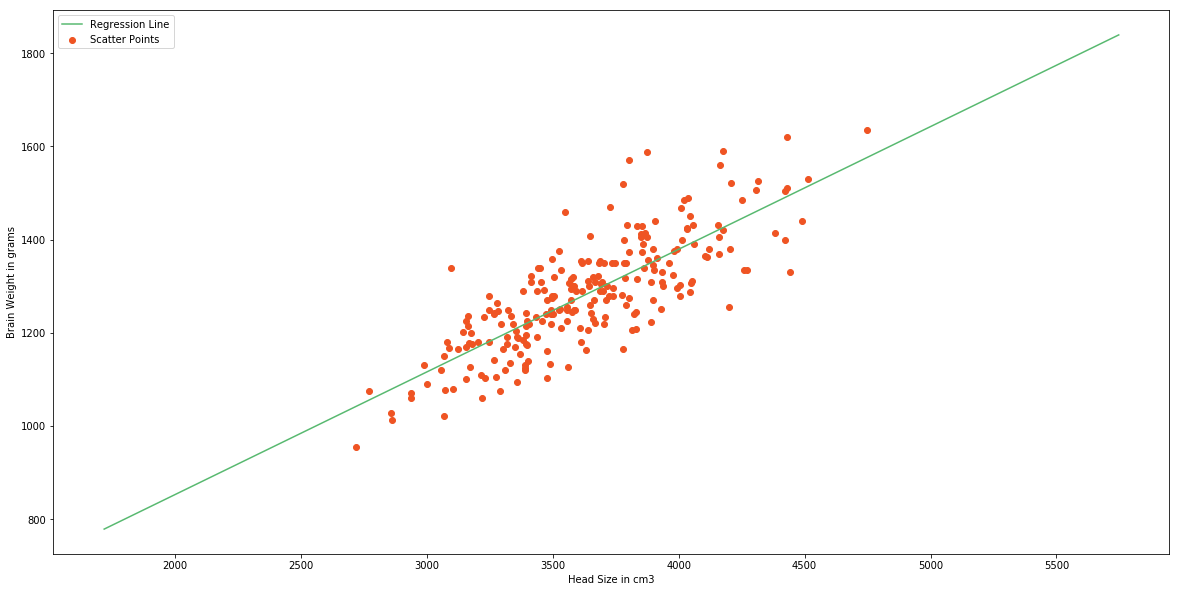

In [57]:
#plotting the graph

max_x = np.max(X) + 1000
min_x = np.min(X) - 1000

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
#plotting scatter points
plt.scatter(X, Y, color='#ef5423', label='Scatter Points')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [58]:
#calculating root mean square error

y_pred = b0 + b1*X
rmse2 = np.dot(Y-y_pred, (Y-y_pred).T)

rmse = np.sqrt(rmse2/m)
print rmse

72.1206213784


In [59]:
#using sci-kit learn approach

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

print(np.sqrt(mse))

72.1206213784
